In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#This imported important packs 

In [2]:
df=pd.read_csv(r'/Users/kendraneumann/Python Labs/NSDUH2.0.csv')
df
#This uploaded the dataset

,QUESTID2,Heroin Age,Heroin Ever,Hep B/C Ever,Hep B/C Age,Unmet MH Need,K6 Psych Distress Score,Psych Distress,WHODAS,MDE Ever,Health,Gender,Race,Education,Employment,Insurance,Govt Program,Income Level,Below Poverty
0,39374400,NaN,No,NaN,NaN,No,8.0,No,8.0,No,1.0,Male,White,HS Grad,Full Time,No,Yes,2,Yes
1,23395500,NaN,No,NaN,NaN,No,9.0,No,0.0,Yes,1.0,Female,White,Some College,Part Time,Yes,No,2,No
2,41595500,NaN,No,NaN,NaN,No,3.0,No,2.0,No,2.0,Male,White,College Grad,Part Time,Yes,No,4,No
3,63105500,20.0,Yes,No,NaN,No,1.0,No,0.0,Yes,3.0,Male,White,Some College,Full Time,Yes,Yes,2,No
4,14815500,NaN,No,NaN,NaN,No,1.0,No,0.0,No,1.0,Female,Multiracial,NaN,NaN,Yes,No,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30762,63883400,NaN,No,NaN,NaN,No,15.0,Yes,20.0,Yes,4.0,Male,Hispanic,Some College,Full Time,Yes,No,2,No
30763,89614400,NaN,No,No,NaN,No,2.0,No,5.0,No,3.0,Male,White,HS Grad,Part Time,Yes,Yes,1,Yes
30764,43544400,NaN,No,NaN,NaN,No,9.0,No,8.0,No,1.0,Male,White,HS Grad,Full Time,Yes,No,4,No
30765,86864400,NaN,No,NaN,NaN,No,2.0,No,3.0,No,1.0,Female,Multiracial,Some College,Part Time,No,No,2,No


In [3]:
df['Heroin Ever'].value_counts()
#This counted the number of heroin users vs non-users

No     30267
Yes      500
Name: Heroin Ever, dtype: int64

In [4]:
def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up))
#This defined how to find CIs for proportions

In [5]:
CI_prop(500, 30767)
#This found the CI for the proportion of people in the US who use heroin

Sample proportion is: 0.016251178210420256
95% CI is: (0.0148383217734347, 0.01766403464740581)


In [6]:
df1=df[['Heroin Ever','Education']]
df1=df1.dropna()
df1
#This found necessary columns and dropped NaNs for heroin use and education level

,Heroin Ever,Education
0,No,HS Grad
1,No,Some College
2,No,College Grad
3,Yes,Some College
5,No,College Grad
...,...,...
30762,No,Some College
30763,No,HS Grad
30764,No,HS Grad
30765,No,Some College


In [7]:
table1 = pd.crosstab(index=df1["Education"], columns=df1["Heroin Ever"]) 
table1
#This created a two-way table for heroin and education use

Heroin Ever,No,Yes
Education,,
College Grad,6090,55
HS Grad,5861,163
Less than HS,2869,91
Some College,7685,181


In [8]:
table1a=pd.DataFrame({'Yes': [91,163,181,55], 'No': [2869,5861,7685,6090]}, 
                     index=['Less than HS','HS Grad','Some College','College Grad'])
table1a
#This was a recreation of the table, because the original table did not recognize 'some college'

,Yes,No
Less than HS,91,2869
HS Grad,163,5861
Some College,181,7685
College Grad,55,6090


In [9]:
table1a['User_per'] = table1a['Yes'] / sum(table1a['Yes'])
table1a['NonUser_per'] = table1a['No'] / sum(table1a['No'])
table1a
#This found proportions for heroin users vs not based on education level, so they could be compared

,Yes,No,User_per,NonUser_per
Less than HS,91,2869,0.185714,0.127483
HS Grad,163,5861,0.332653,0.260431
Some College,181,7685,0.369388,0.341480
College Grad,55,6090,0.112245,0.270607


In [10]:
table1aa = table1a[['User_per','NonUser_per']]
table1aa
#This isolated the columns necessary for visualization of education level and heroin use

,User_per,NonUser_per
Less than HS,0.185714,0.127483
HS Grad,0.332653,0.260431
Some College,0.369388,0.341480
College Grad,0.112245,0.270607


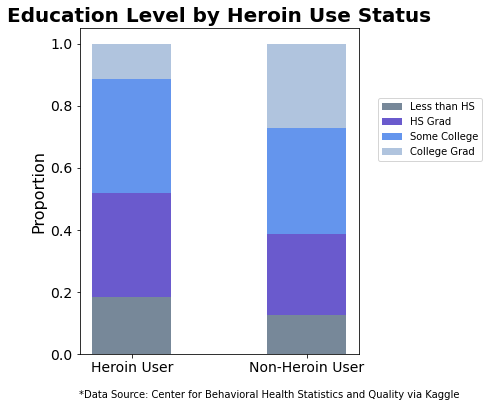

In [11]:
import matplotlib.pyplot as plt

label = ['Heroin User','Non-Heroin User']
y_value1 = table1aa.loc['Less than HS']
y_value2 = table1aa.loc['HS Grad']
y_value3 = table1aa.loc['Some College']
y_value4 = table1aa.loc['College Grad']

fig, axs = plt.subplots(figsize=(5,6))      
p1 = axs.bar(label, y_value1, color='lightslategray', width=0.45)     
p2 = axs.bar(label, y_value2, color='slateblue', bottom=y_value1, width=0.45)
p3 = axs.bar(label, y_value3, color='cornflowerblue', bottom=y_value1+y_value2, width=0.45)
p4 = axs.bar(label, y_value4, color='lightsteelblue', bottom=y_value1+y_value2+y_value3, width=0.45)

axs.set_title("Education Level by Heroin Use Status", fontsize=20, fontweight="bold")   
axs.set_xlabel("", fontsize=16)
axs.set_ylabel("Proportion", fontsize=16)
axs.tick_params(labelsize=14)  
axs.legend((p1[0],p2[0],p3[0],p4[0]),(table1aa.index),
          bbox_to_anchor=(1.05, 0.8))
plt.text(-.3,-.14, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
plt.show() 
#This created a stacked bar chart for looking at heroin use and education level

In [12]:
df2=df[['Heroin Ever','Insurance']]
df2=df2.dropna()
df2
#This found necessary columns and dropped NaNs to compare insurance coverage based on heroin use

,Heroin Ever,Insurance
0,No,No
1,No,Yes
2,No,Yes
3,Yes,Yes
4,No,Yes
...,...,...
30762,No,Yes
30763,No,Yes
30764,No,Yes
30765,No,No


In [13]:
table2 = pd.crosstab(index=df2["Heroin Ever"], columns=df2["Insurance"]) 
table2
#This created a two-way table for insurance and heroin use

Insurance,No,Yes
Heroin Ever,,
No,2809,27458
Yes,85,415


In [14]:
table2['Total'] = table2['No'] + table2['Yes']
table2['Insured_per'] = table2['Yes'] / table2['Total']
table2['Uninsured_per'] = table2['No'] / table2['Total']
table2['Insured%']= table2['Insured_per']*100
table2['Uninsured%']= table2['Uninsured_per']*100
table2
#This found percentages to compare heroin use and insurance coverage

Insurance,No,Yes,Total,Insured_per,Uninsured_per,Insured%,Uninsured%
Heroin Ever,,,,,,,
No,2809,27458,30267,0.907193,0.092807,90.719265,9.280735
Yes,85,415,500,0.830000,0.170000,83.000000,17.000000


In [15]:
table2=table2.transpose()
table2
#This transposed the above table for visualization purposes

Heroin Ever,No,Yes
Insurance,,
No,2809.000000,85.00
Yes,27458.000000,415.00
Total,30267.000000,500.00
Insured_per,0.907193,0.83
Uninsured_per,0.092807,0.17
Insured%,90.719265,83.00
Uninsured%,9.280735,17.00


In [16]:
unin_perc=['9.28%','17.00%']
#This was used to label the bar graph for heroin use and insurance

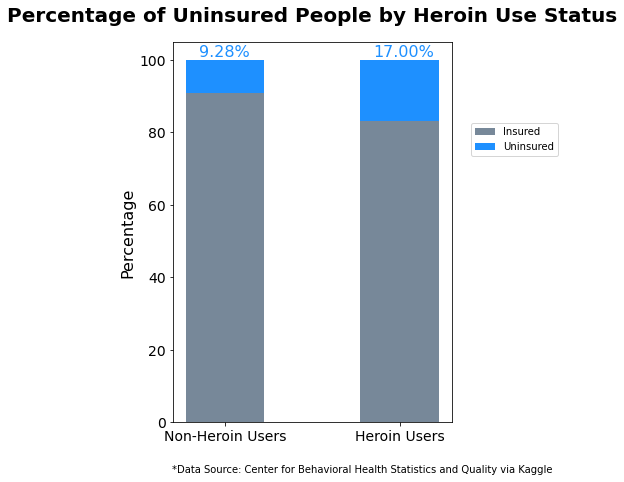

In [17]:
label = ['Non-Heroin Users','Heroin Users']
y_value1 = table2.loc['Insured%']
y_value2 = table2.loc['Uninsured%']

fig, axs = plt.subplots(figsize=(5,7))      
p1 = axs.bar(label, y_value1, color='lightslategray', width=0.45)     
p2 = axs.bar(label, y_value2, color='dodgerblue', bottom=y_value1, width=0.45)


axs.set_title("Percentage of Uninsured People by Heroin Use Status", fontsize=20, fontweight="bold", pad=20)   
axs.set_xlabel("", fontsize=16)
axs.set_ylabel("Percentage", fontsize=16)
axs.tick_params(labelsize=14)  
axs.legend((p1[0],p2[0]),('Insured','Uninsured'),
          bbox_to_anchor=(1.05, 0.8))
plt.text(-.3,-14, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
for i in range(len(y_value2)):
    plt.text(i-0.15,y_value1[i]+y_value2[i]+1, str(unin_perc[i]), color='dodgerblue', size=16)
            
plt.show() 
#This created a stacked bar chart looking at proportion of uninsured people based on heroin use

In [18]:
def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up))
#This defined how to find CIs for proportions

In [19]:
CI_prop(2809,30267)
#This found the confidence interval for the prop of uninsured non users

Sample proportion is: 0.09280734793669673
95% CI is: (0.08953836746515846, 0.096076328408235)


In [20]:
CI_prop(85,500)
#This found the confidence interval for the prop of uninsured heroin users

Sample proportion is: 0.17
95% CI is: (0.13707433341601116, 0.20292566658398886)


In [21]:
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))
#This defined how to find CIs for proportion differences

In [22]:
CI_prop_diff(85,2809,500,30267)
#This found 95% CI in prop difference between uninsured heroin users and non users

Proportion difference is: 0.07719265206330328
95% CI is: (0.044105105262077615, 0.11028019886452894)


In [23]:
table2a=pd.crosstab(index=df2["Heroin Ever"], columns=df2["Insurance"]) 
#This recreated the table to find the p-value regarding heroin use and insurance

In [24]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table2a)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)
#This found the p-value of the proportion difference in uninsured proportion based on heroin use

chi2: 33.49501134471069
p: 7.144701028671687e-09
dof: 1
expected: [[ 2846.96909026 27420.03090974]
 [   47.03090974   452.96909026]]


In [25]:
df3=df[['Heroin Ever', 'K6 Psych Distress Score']]
df3=df3.dropna()
df3
#This found necessary columns and dropped NaNs to compare heroin use and psychiatric distress score

,Heroin Ever,K6 Psych Distress Score
0,No,8.0
1,No,9.0
2,No,3.0
3,Yes,1.0
4,No,1.0
...,...,...
30762,No,15.0
30763,No,2.0
30764,No,9.0
30765,No,2.0


In [26]:
heroin=df3['Heroin Ever']=='Yes'
noheroin=df3['Heroin Ever']=='No'

heroin_df3=df3[heroin]
noheroin_df3=df3[noheroin]

heroin_k6=heroin_df3['K6 Psych Distress Score']
noheroin_k6=noheroin_df3['K6 Psych Distress Score']
#This created two dataframes for the boxplot of psych distress and heroin use

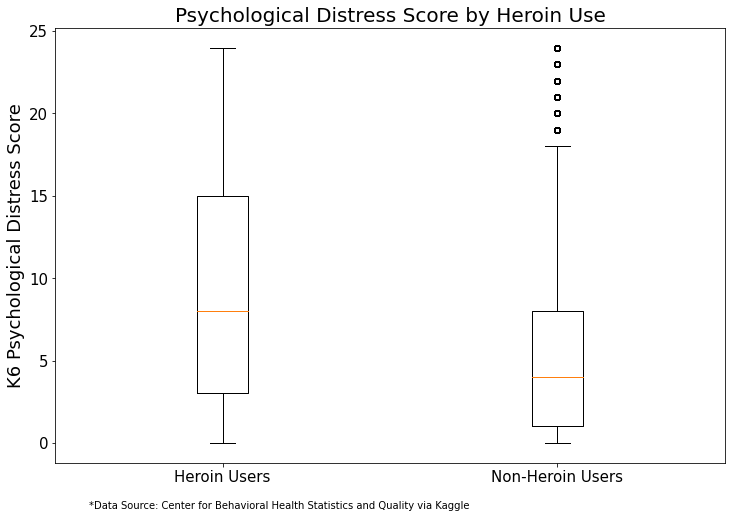

In [27]:
fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([heroin_df3['K6 Psych Distress Score'], noheroin_df3['K6 Psych Distress Score']])
plt.title("Psychological Distress Score by Heroin Use", fontsize=20)
axs.set_xticklabels(['Heroin Users','Non-Heroin Users'])
axs.set_ylabel('K6 Psychological Distress Score', fontsize=18)
axs.tick_params(labelsize=15)
plt.text(.6,-4, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
plt.show()
#This created a boxplot of psych distress and heroin use

In [28]:
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))
#This defined how to find the CI of means 

In [29]:
CI_mean(heroin_df3['K6 Psych Distress Score'])
#This found CI of mean of psych distress score among heroin users

Average is: 9.593939393939394
95% CI of mean is: (8.94168225543649, 10.246196532442298)


In [30]:
CI_mean(noheroin_df3['K6 Psych Distress Score'])
#This found CI of mean of psych distress score among non users

Average is: 5.580666306778746
95% CI of mean is: (5.508033953908055, 5.653298659649438)


In [31]:
def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))
#This defined how to find CI of mean differences

In [32]:
CI_mean_diff(heroin_df3['K6 Psych Distress Score'], noheroin_df3['K6 Psych Distress Score'])
#This found CI of mean diff in psych distress scores between users and non users

The average difference is: 4.0132730871606475
The 95% CI is: (3.3569844057013913, 4.669561768619904)


In [33]:
from scipy import stats

t_val, p_val = stats.ttest_ind(heroin_df3['K6 Psych Distress Score'], noheroin_df3['K6 Psych Distress Score'], equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)
#This found the p-value of the mean difference in psych distress scores between users and non users 

Test statistic: 11.973635009565363
p-value: 2.9020045294000394e-29


In [34]:
df4=df[['Heroin Ever','Psych Distress']]
df4=df4.dropna()
df4
#This found necessary columns and dropped NaNs to compare heroin use and 
#whether people are classified as have psychological distress (based on score)

,Heroin Ever,Psych Distress
0,No,No
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
30762,No,Yes
30763,No,No
30764,No,No
30765,No,No


In [35]:
table4 = pd.crosstab(index=df4["Heroin Ever"], columns=df4["Psych Distress"]) 

table4['Total'] = table4['No'] + table4['Yes']
table4['Dist_per'] = table4['Yes'] / table4['Total']
table4['NoDist_per'] = table4['No'] / table4['Total']
table4['Dist%']= table4['Dist_per']*100
table4['NoDist%']= table4['NoDist_per']*100

table4=table4.transpose()

table4
#This created a table, found comparable percentages, and transposed the table for visualization purposes.
#This compares psych distress based on heroin use

Heroin Ever,No,Yes
Psych Distress,,
No,22277.000000,324.000000
Yes,3657.000000,171.000000
Total,25934.000000,495.000000
Dist_per,0.141012,0.345455
NoDist_per,0.858988,0.654545
Dist%,14.101180,34.545455
NoDist%,85.898820,65.454545


In [36]:
dist=['14.10%','34.55%']
#This created rounded values to use as labels in the bar graph below 

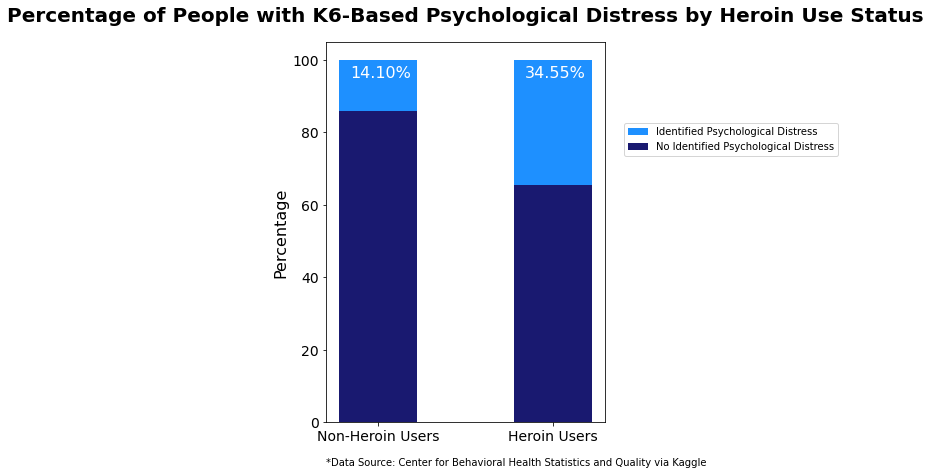

In [37]:
label = ['Non-Heroin Users','Heroin Users']
y_value1 = table4.loc['NoDist%']
y_value2 = table4.loc['Dist%']

fig, axs = plt.subplots(figsize=(5,7))      
p1 = axs.bar(label, y_value1, color='midnightblue', width=0.45)     
# Don't forget the bottom from p2
p2 = axs.bar(label, y_value2, color='dodgerblue', bottom=y_value1, width=0.45)


axs.set_title("Percentage of People with K6-Based Psychological Distress by Heroin Use Status", 
              fontsize=20, fontweight="bold", pad=20)   
axs.set_xlabel("", fontsize=16)
axs.set_ylabel("Percentage", fontsize=16)
axs.tick_params(labelsize=14)  
axs.legend((p2[0],p1[0]),('Identified Psychological Distress','No Identified Psychological Distress'),
          bbox_to_anchor=(1.05, 0.8))
plt.text(-.3,-12, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
for i in range(len(y_value2)):
    plt.text(i-.16,y_value1[i]+y_value2[i]-5, str(dist[i]), color='white', size=16)
             
plt.show() 
#This created a stacked bar chart to look at identified psych distress by heroin use

In [38]:
CI_prop(171,495)
#This found 95% CI prop of psych distress positivity for heroin users

Sample proportion is: 0.34545454545454546
95% CI is: (0.30356372819110156, 0.38734536271798936)


In [39]:
CI_prop(3657,25934)
#This found 95% CI prop of psych distress positivity for non users

Sample proportion is: 0.14101179918254028
95% CI is: (0.1367759289761273, 0.14524766938895325)


In [40]:
CI_prop_diff(171,3657,495,25934)
#This found CI prop of difference between psych distress positivity in users vs non users

Proportion difference is: 0.20444274627200518
95% CI is: (0.16233831458833528, 0.24654717795567507)


In [41]:
table4a=pd.crosstab(index=df4["Heroin Ever"], columns=df4["Psych Distress"]) 
#This recreated the table to find the p-value regarding an association between psych distress and heroin use

In [42]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table4a)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)
#The found the p value regarding an association between psych distress and heroin use

chi2: 162.26125207781874
p: 3.627546352099605e-37
dof: 1
expected: [[22177.69624276  3756.30375724]
 [  423.30375724    71.69624276]]


In [43]:
df5=df[['Heroin Ever','Unmet MH Need']]
df5=df5.dropna()
df5
#This found necessary columns and dropped NaNs to look at heroin use and unmet mental health need

,Heroin Ever,Unmet MH Need
0,No,No
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
30762,No,No
30763,No,No
30764,No,No
30765,No,No


In [44]:
table5 = pd.crosstab(index=df5["Heroin Ever"], columns=df5["Unmet MH Need"]) 

table5['Total'] = table5['No'] + table5['Yes']
table5['Need_per'] = table5['Yes'] / table5['Total']
table5['NoNeed_per'] = table5['No'] / table5['Total']
table5['Need%']= table5['Need_per']*100
table5['NoNeed%']= table5['NoNeed_per']*100
table5
#This created a table and found comparable percentages in heroin use and unmet MH need

Unmet MH Need,No,Yes,Total,Need_per,NoNeed_per,Need%,NoNeed%
Heroin Ever,,,,,,,
No,24170,1702,25872,0.065785,0.934215,6.578541,93.421459
Yes,416,77,493,0.156187,0.843813,15.618661,84.381339


In [45]:
table5=table5.transpose()
table5
#This transposed the above table, to make it easier to create a bar chart

Heroin Ever,No,Yes
Unmet MH Need,,
No,24170.000000,416.000000
Yes,1702.000000,77.000000
Total,25872.000000,493.000000
Need_per,0.065785,0.156187
NoNeed_per,0.934215,0.843813
Need%,6.578541,15.618661
NoNeed%,93.421459,84.381339


In [46]:
unmet_need=['6.58%','15.62%']
#These captions were used for the bar chart (below)

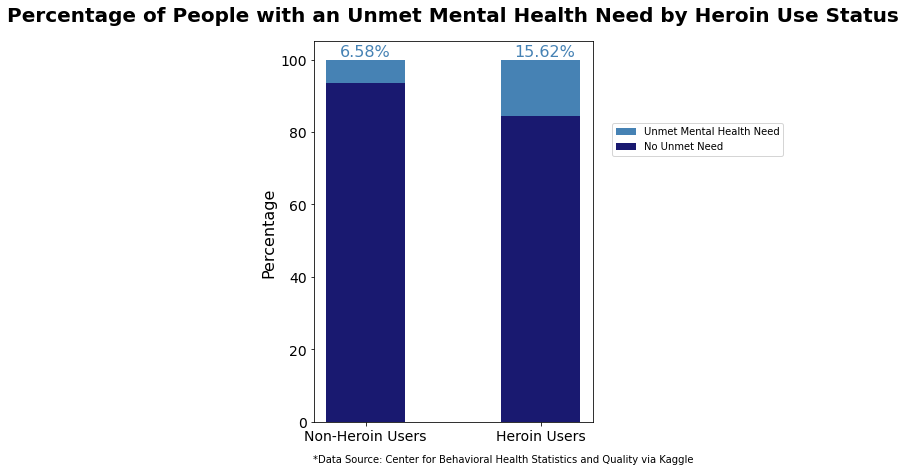

In [47]:
label = ['Non-Heroin Users','Heroin Users']
y_value1 = table5.loc['NoNeed%']
y_value2 = table5.loc['Need%']

fig, axs = plt.subplots(figsize=(5,7))      
p1 = axs.bar(label, y_value1, color='midnightblue', width=0.45)     
# Don't forget the bottom from p2
p2 = axs.bar(label, y_value2, color='steelblue', bottom=y_value1, width=0.45)


axs.set_title("Percentage of People with an Unmet Mental Health Need by Heroin Use Status", 
              fontsize=20, fontweight="bold", pad=20)   
axs.set_xlabel("", fontsize=16)
axs.set_ylabel("Percentage", fontsize=16)
axs.tick_params(labelsize=14)  
axs.legend((p2[0],p1[0]),('Unmet Mental Health Need','No Unmet Need'),
          bbox_to_anchor=(1.05, 0.8))
plt.text(-.3,-11, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
for i in range(len(y_value2)):
    plt.text(i-.15,y_value1[i]+y_value2[i]+1, str(unmet_need[i]), color='steelblue', size=16)
             
plt.show() 
#This created a stacked bar chart to look at percent unmet MH need based on heroin use

In [48]:
CI_prop(77,493)
#This found CI prop of unmet mental health need for heroin users

Sample proportion is: 0.15618661257606492
95% CI is: (0.12414032539030899, 0.18823289976182084)


In [49]:
CI_prop(1702,25872)
#This found CI prop of unmet mental health need for non users

Sample proportion is: 0.06578540507111935
95% CI is: (0.06276455500412954, 0.06880625513810916)


In [50]:
CI_prop_diff(77,1702,493,25872)
#This found CI prop diff of unmet mental health need for users vs non users

Proportion difference is: 0.09040120750494557
95% CI is: (0.058212854680994214, 0.12258956032889692)


In [51]:
table5a = pd.crosstab(index=df5["Heroin Ever"], columns=df5["Unmet MH Need"]) 
#This recreated the table to find the p value regarding an association between heroin use and unmet need 

In [52]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table5a)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)
#This found the p value regarding an association between heroin use and unmet need 

chi2: 61.4047357693541
p: 4.646914577453086e-15
dof: 1
expected: [[24126.26557937  1745.73442063]
 [  459.73442063    33.26557937]]


In [53]:
df6=df[['Heroin Age','Hep B/C Age']]
df6=df6.dropna()
df6
#This found necessary columns and dropped NaNs to compare heroin age and hep b/c age

,Heroin Age,Hep B/C Age
61,14.0,22.0
490,26.0,28.0
1100,21.0,20.0
1268,28.0,40.0
1756,18.0,33.0
...,...,...
29124,22.0,27.0
29130,15.0,45.0
29452,20.0,20.0
29639,12.0,17.0


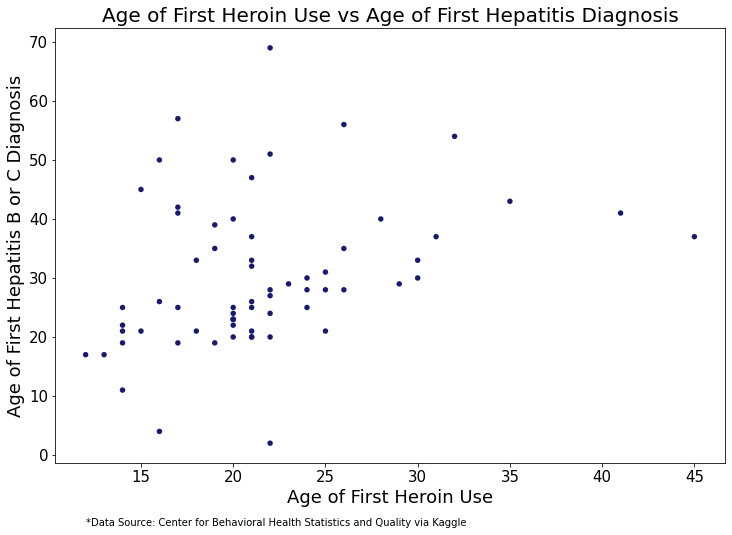

In [54]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df6['Heroin Age'], df6['Hep B/C Age'], c='midnightblue', edgecolors='none', s=30)
plt.title("Age of First Heroin Use vs Age of First Hepatitis Diagnosis", fontsize=20)
axs.set_xlabel("Age of First Heroin Use", fontsize=18)
axs.set_ylabel("Age of First Hepatitis B or C Diagnosis", fontsize=18)
axs.tick_params(labelsize=15)
plt.text(12,-12, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
plt.show()
#This created a scatterplot of age of first heroin use vs age of first hep b/c diagnosis

In [55]:
from scipy import stats
corr = stats.pearsonr(df6['Heroin Age'], df6['Hep B/C Age'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])
#This found a correlation for the scatterplot between heroin age and hep b/c age

Correlation coefficient: 0.3139255960517344
p-value: 0.010262397351997883


In [56]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df6['Heroin Age'].values
y_vals = df6['Hep B/C Age']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())
#This found a regression for the scatterplot between heroin age and hep b/c age

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Hep B/C Age   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     6.997
Date:                Mon, 21 Dec 2020   Prob (F-statistic):             0.0103
Time:                        16:26:35   Log-Likelihood:                -256.48
No. Observations:                  66   AIC:                             517.0
Df Residuals:                      64   BIC:                             521.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4882      5.405      3.051      0.003       5.691      27.285
x1             0.6379      0.241      2.645      0.010       0.156       1.120
==============================================================================
Omnibus:                       12.707   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.677
Skew:                           0.931   Prob(JB):                      0.00107
Kurtosis:                       4.228   Cond. No.                         82.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df6['Heroin Age']), np.max(df6['Heroin Age']), 100)
#This helped created a trendline for the above scatterplot

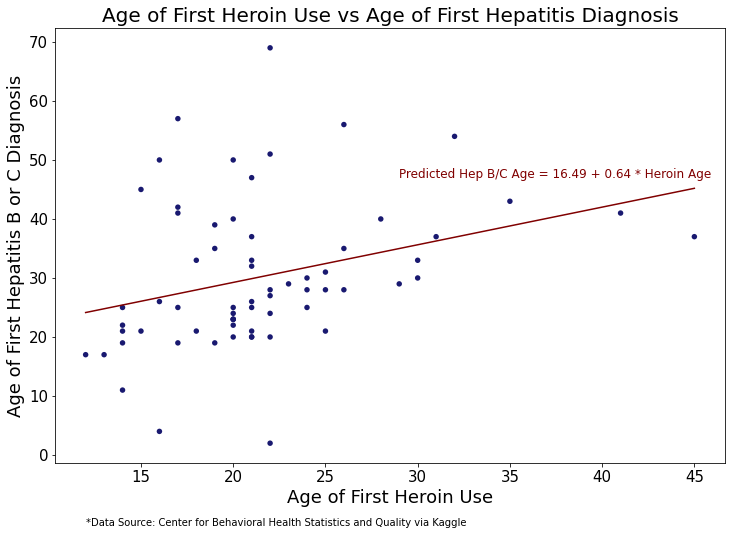

In [58]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df6['Heroin Age'], df6['Hep B/C Age'], c='midnightblue', edgecolors='none', s=30)
plt.title("Age of First Heroin Use vs Age of First Hepatitis Diagnosis", fontsize=20)
axs.set_xlabel("Age of First Heroin Use", fontsize=18)
axs.set_ylabel("Age of First Hepatitis B or C Diagnosis", fontsize=18)
axs.tick_params(labelsize=15)
axs.plot(x_plot, x_plot*b1 + b0, color='maroon')
plt.text(29,47,'Predicted Hep B/C Age = 16.49 + 0.64 * Heroin Age', color='maroon',size=12)
plt.text(12,-12, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
plt.show()
#This recreated the above scatterplot (heroin age vs hep b/c age) with a trendline 

In [59]:
df7=df[['Heroin Ever','Hep B/C Ever']]
df7=df7.dropna()
df7
#This found necessary columns and dropped NaNs to compare heroin use and hep b/c positivity

,Heroin Ever,Hep B/C Ever
3,Yes,No
11,No,No
12,No,No
13,No,No
24,No,No
...,...,...
30758,No,No
30759,No,No
30760,No,No
30761,No,No


In [60]:
table7 = pd.crosstab(index=df7["Heroin Ever"], columns=df7["Hep B/C Ever"]) 

table7['Total'] = table7['No'] + table7['Yes']
table7['HBC_per'] = table7['Yes'] / table7['Total']
table7['NoHBC_per'] = table7['No'] / table7['Total']
table7['HBC%']= table7['HBC_per']*100
table7['NoHBC%']= table7['NoHBC_per']*100

table7=table7.transpose()
table7
#This created a table, found comparable percentages, and transposed the table to compare heroin age and hep b/c age

Heroin Ever,No,Yes
Hep B/C Ever,,
No,8271.000000,131.000000
Yes,164.000000,70.000000
Total,8435.000000,201.000000
HBC_per,0.019443,0.348259
NoHBC_per,0.980557,0.651741
HBC%,1.944280,34.825871
NoHBC%,98.055720,65.174129


In [61]:
hbc=['1.94%','34.83%']
#This created rounded values to be used as labels in the below bar chart

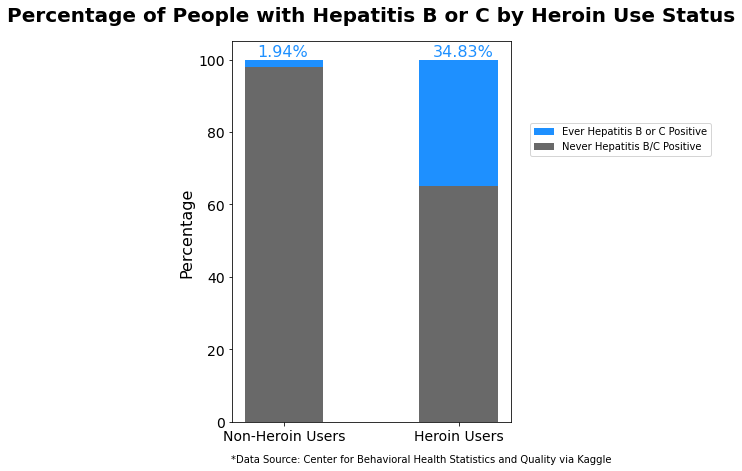

In [62]:
label = ['Non-Heroin Users','Heroin Users']
y_value1 = table7.loc['NoHBC%']
y_value2 = table7.loc['HBC%']

fig, axs = plt.subplots(figsize=(5,7))      
p1 = axs.bar(label, y_value1, color='dimgrey', width=0.45)     
# Don't forget the bottom from p2
p2 = axs.bar(label, y_value2, color='dodgerblue', bottom=y_value1, width=0.45)


axs.set_title("Percentage of People with Hepatitis B or C by Heroin Use Status", 
              fontsize=20, fontweight="bold", pad=20)   
axs.set_xlabel("", fontsize=16)
axs.set_ylabel("Percentage", fontsize=16)
axs.tick_params(labelsize=14)  
axs.legend((p2[0],p1[0]),('Ever Hepatitis B or C Positive','Never Hepatitis B/C Positive'),
          bbox_to_anchor=(1.05, 0.8))
plt.text(-.3,-11, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
for i in range(len(y_value2)):
    plt.text(i-.15,y_value1[i]+y_value2[i]+1, str(hbc[i]), color='dodgerblue', size=16)
             
plt.show() 
#This created a stacked bar chart comparing heroin use and hep b/c positivity

In [63]:
CI_prop(70,201)
#This found CI of prop of hep b/c pos for heroin users

Sample proportion is: 0.3482587064676617
95% CI is: (0.28239492627093576, 0.41412248666438767)


In [64]:
CI_prop(164,8435)
#This found CI of prop of hep b/c pos for non users

Sample proportion is: 0.01944279786603438
95% CI is: (0.01649614229198195, 0.02238945344008681)


In [65]:
CI_prop_diff(70,164,201,8435)
#This found CI of prop diff in hep b/c positivity between users and non users

Proportion difference is: 0.32881590860162735
95% CI is: (0.262886246681709, 0.3947455705215457)


In [66]:
table7a = pd.crosstab(index=df7["Heroin Ever"], columns=df7["Hep B/C Ever"]) 
#This recreted the table to find the p value regarding an association between heroin use and hep b/c positivity

In [67]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table7a)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)
#This found the p value regarding an association between heroin use and hep b/c positivity

chi2: 792.769717334136
p: 2.014019188089385e-174
dof: 1
expected: [[8.20644627e+03 2.28553729e+02]
 [1.95553729e+02 5.44627142e+00]]


In [68]:
df9=df[['Heroin Ever','Below Poverty ']]
df9=df9.dropna()
df9
#This found necessary columns and dropped NaNs to compare heroin use and proportion of people below poverty level

,Heroin Ever,Below Poverty
0,No,Yes
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
30762,No,No
30763,No,Yes
30764,No,No
30765,No,No


In [69]:
table9=pd.crosstab(index=df9["Heroin Ever"], columns=df9["Below Poverty "]) 
table9['Total'] = table9['No'] + table9['Yes']
table9['below_per'] = table9['Yes'] / table9['Total']
table9['above_per'] = table9['No'] / table9['Total']
table9
#This created a table to compare heroin use and whether people are above or below the poverty level

Below Poverty,No,Yes,Total,below_per,above_per
Heroin Ever,,,,,
No,24247,5906,30153,0.195868,0.804132
Yes,371,129,500,0.258000,0.742000


In [70]:
below_prop=[0.195868,0.258000]
non=below_prop[0]
relative=[]

for i in range(len(below_prop)):
    j= below_prop[i] / non
    relative.append(j)
relative
#This changed the proportions into relative values, concerning being below the poverty level,
#with non-users as a base of one

[1.0, 1.3172136336716564]

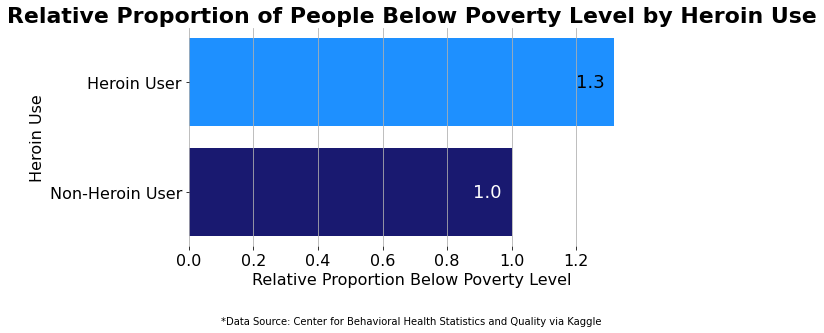

In [71]:
y_values=relative
x_values=['Non-Heroin User', 'Heroin User']

np.random.seed(19680801)

fig, axs = plt.subplots(figsize=(8,4)) # Change the figure size here       
axs.barh(x_values, y_values, color=('midnightblue','dodgerblue')) # You specify the color here     
axs.set_title("Relative Proportion of People Below Poverty Level by Heroin Use", fontsize=22, fontweight="bold")   
axs.set_xlabel("Relative Proportion Below Poverty Level", fontsize=16)
axs.set_ylabel("Heroin Use", fontsize=16)
axs.tick_params(labelsize=16)   

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)

plt.text(0.88,0,'1.0',color='white',va='center',size=18)
plt.text(1.2,1,'1.3',color='black',va='center',size=18)
plt.text(.1,-1.2, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)
plt.grid(axis='x')


plt.show()
#This created a horizontal bar chart that compared proportions between heroin users and non-heroin users

In [72]:
df10=df[['Heroin Ever','Employment']]
df10=df10.dropna()
df10
#This got relevant variables and dropped NaNs to look at heroin use and employment status

,Heroin Ever,Employment
0,No,Full Time
1,No,Part Time
2,No,Part Time
3,Yes,Full Time
5,No,Full Time
...,...,...
30762,No,Full Time
30763,No,Part Time
30764,No,Full Time
30765,No,Part Time


In [73]:
table10=pd.crosstab(index=df10["Heroin Ever"], columns=df10["Employment"]) 

table10
#This created a table about employment status by heroin use

Employment,Full Time,Part Time,Unemployed
Heroin Ever,,,
No,11668,3576,1328
Yes,224,70,57


In [74]:
table10['Total'] = table10['Full Time'] + table10['Part Time'] + table10['Unemployed']
table10['full_per'] = table10['Full Time'] / table10['Total']
table10['part_per'] = table10['Part Time'] / table10['Total']
table10['un_per'] = table10['Unemployed'] / table10['Total']
table10
#This found proportions on the tables to compare employment statuses

Employment,Full Time,Part Time,Unemployed,Total,full_per,part_per,un_per
Heroin Ever,,,,,,,
No,11668,3576,1328,16572,0.704079,0.215786,0.080135
Yes,224,70,57,351,0.638177,0.199430,0.162393


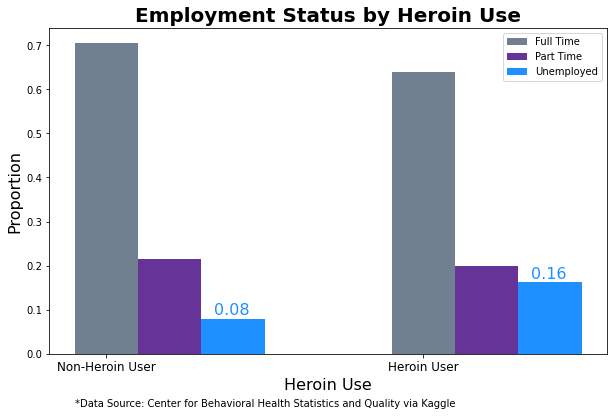

In [75]:
labels = ['Non-Heroin User','Heroin User'] 
y_value1 = table10['full_per'] 
y_value2 = table10['part_per'] 
y_value3 = table10['un_per'] 

x = np.arange(len(labels))
width = 0.2  

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y_value1, width, label='Full Time',color='slategrey')
ax.bar(x + width, y_value2, width, label='Part Time',color='rebeccapurple')
ax.bar(x + 2 * width, y_value3, width, label='Unemployed',color='dodgerblue')


ax.set_ylabel('Proportion', fontsize=16)
ax.set_xlabel('Heroin Use', fontsize=16)
ax.set_title('Employment Status by Heroin Use',fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

plt.text(.34,0.09, '0.08', color='dodgerblue', size=16)
plt.text(1.34,0.17, '0.16', color='dodgerblue', size=16)
plt.text(-.1,-.12, "*Data Source: Center for Behavioral Health Statistics and Quality via Kaggle", size=10)

plt.show()
#This created a group bar chart of employment status by heroin use